In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-12 17:30:28.121687: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
x = xfirst.profile_functions.usp().parameter_names
y = 'Xfirst'

### Load data

In [3]:
data = xfirst.data.load_fits(
  datadir = 'data',
  cut = xfirst.config.cut.C3,
  columns = x,
  xfirst = True,
  norm = x,
  drop_bad = {'train': True, 'validation': True, 'test': False},
  nshowers = 10000,
)

### Train the MLP

In [4]:
model = xfirst.models.multilayer_perceptron_regressor(
  input = len(x),
  layers = [32, 32],
  epochs = 20,
).fit(data, x, y)

+ training the model on ['lgNmax', 'Xmax', 'L', 'R'] for target Xfirst
Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 369.8535 - val_loss: 182.6438 - lr: 0.0010
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 180.7484 - val_loss: 175.4152 - lr: 0.0010
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 175.9910 - val_loss: 172.4929 - lr: 0.0010
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 173.6963 - val_loss: 171.9518 - lr: 0.0010
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 172.6953 - val_loss: 171.5061 - lr: 0.0010
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 171.3744 - val_loss: 171.1092 - lr: 0.0010
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 170.9710 - val_loss: 169.3290 - lr: 0.0010
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 170.4095 - val_loss

2023-07-12 17:30:40.213896: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Validation curve

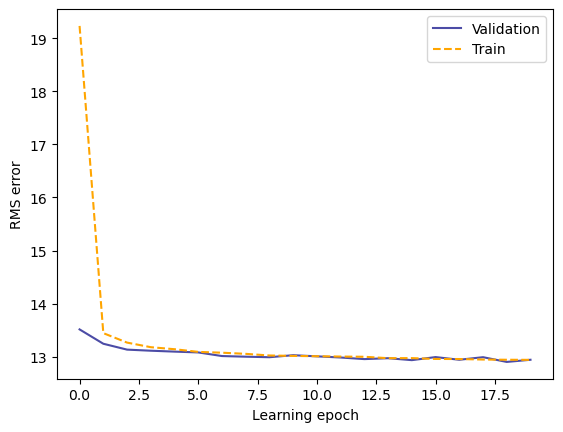

In [5]:
fig = model.draw()

### Compute predictions

+ computing predictions
1563/1563 [==============================] - 3s 2ms/step
+ drawing predictions


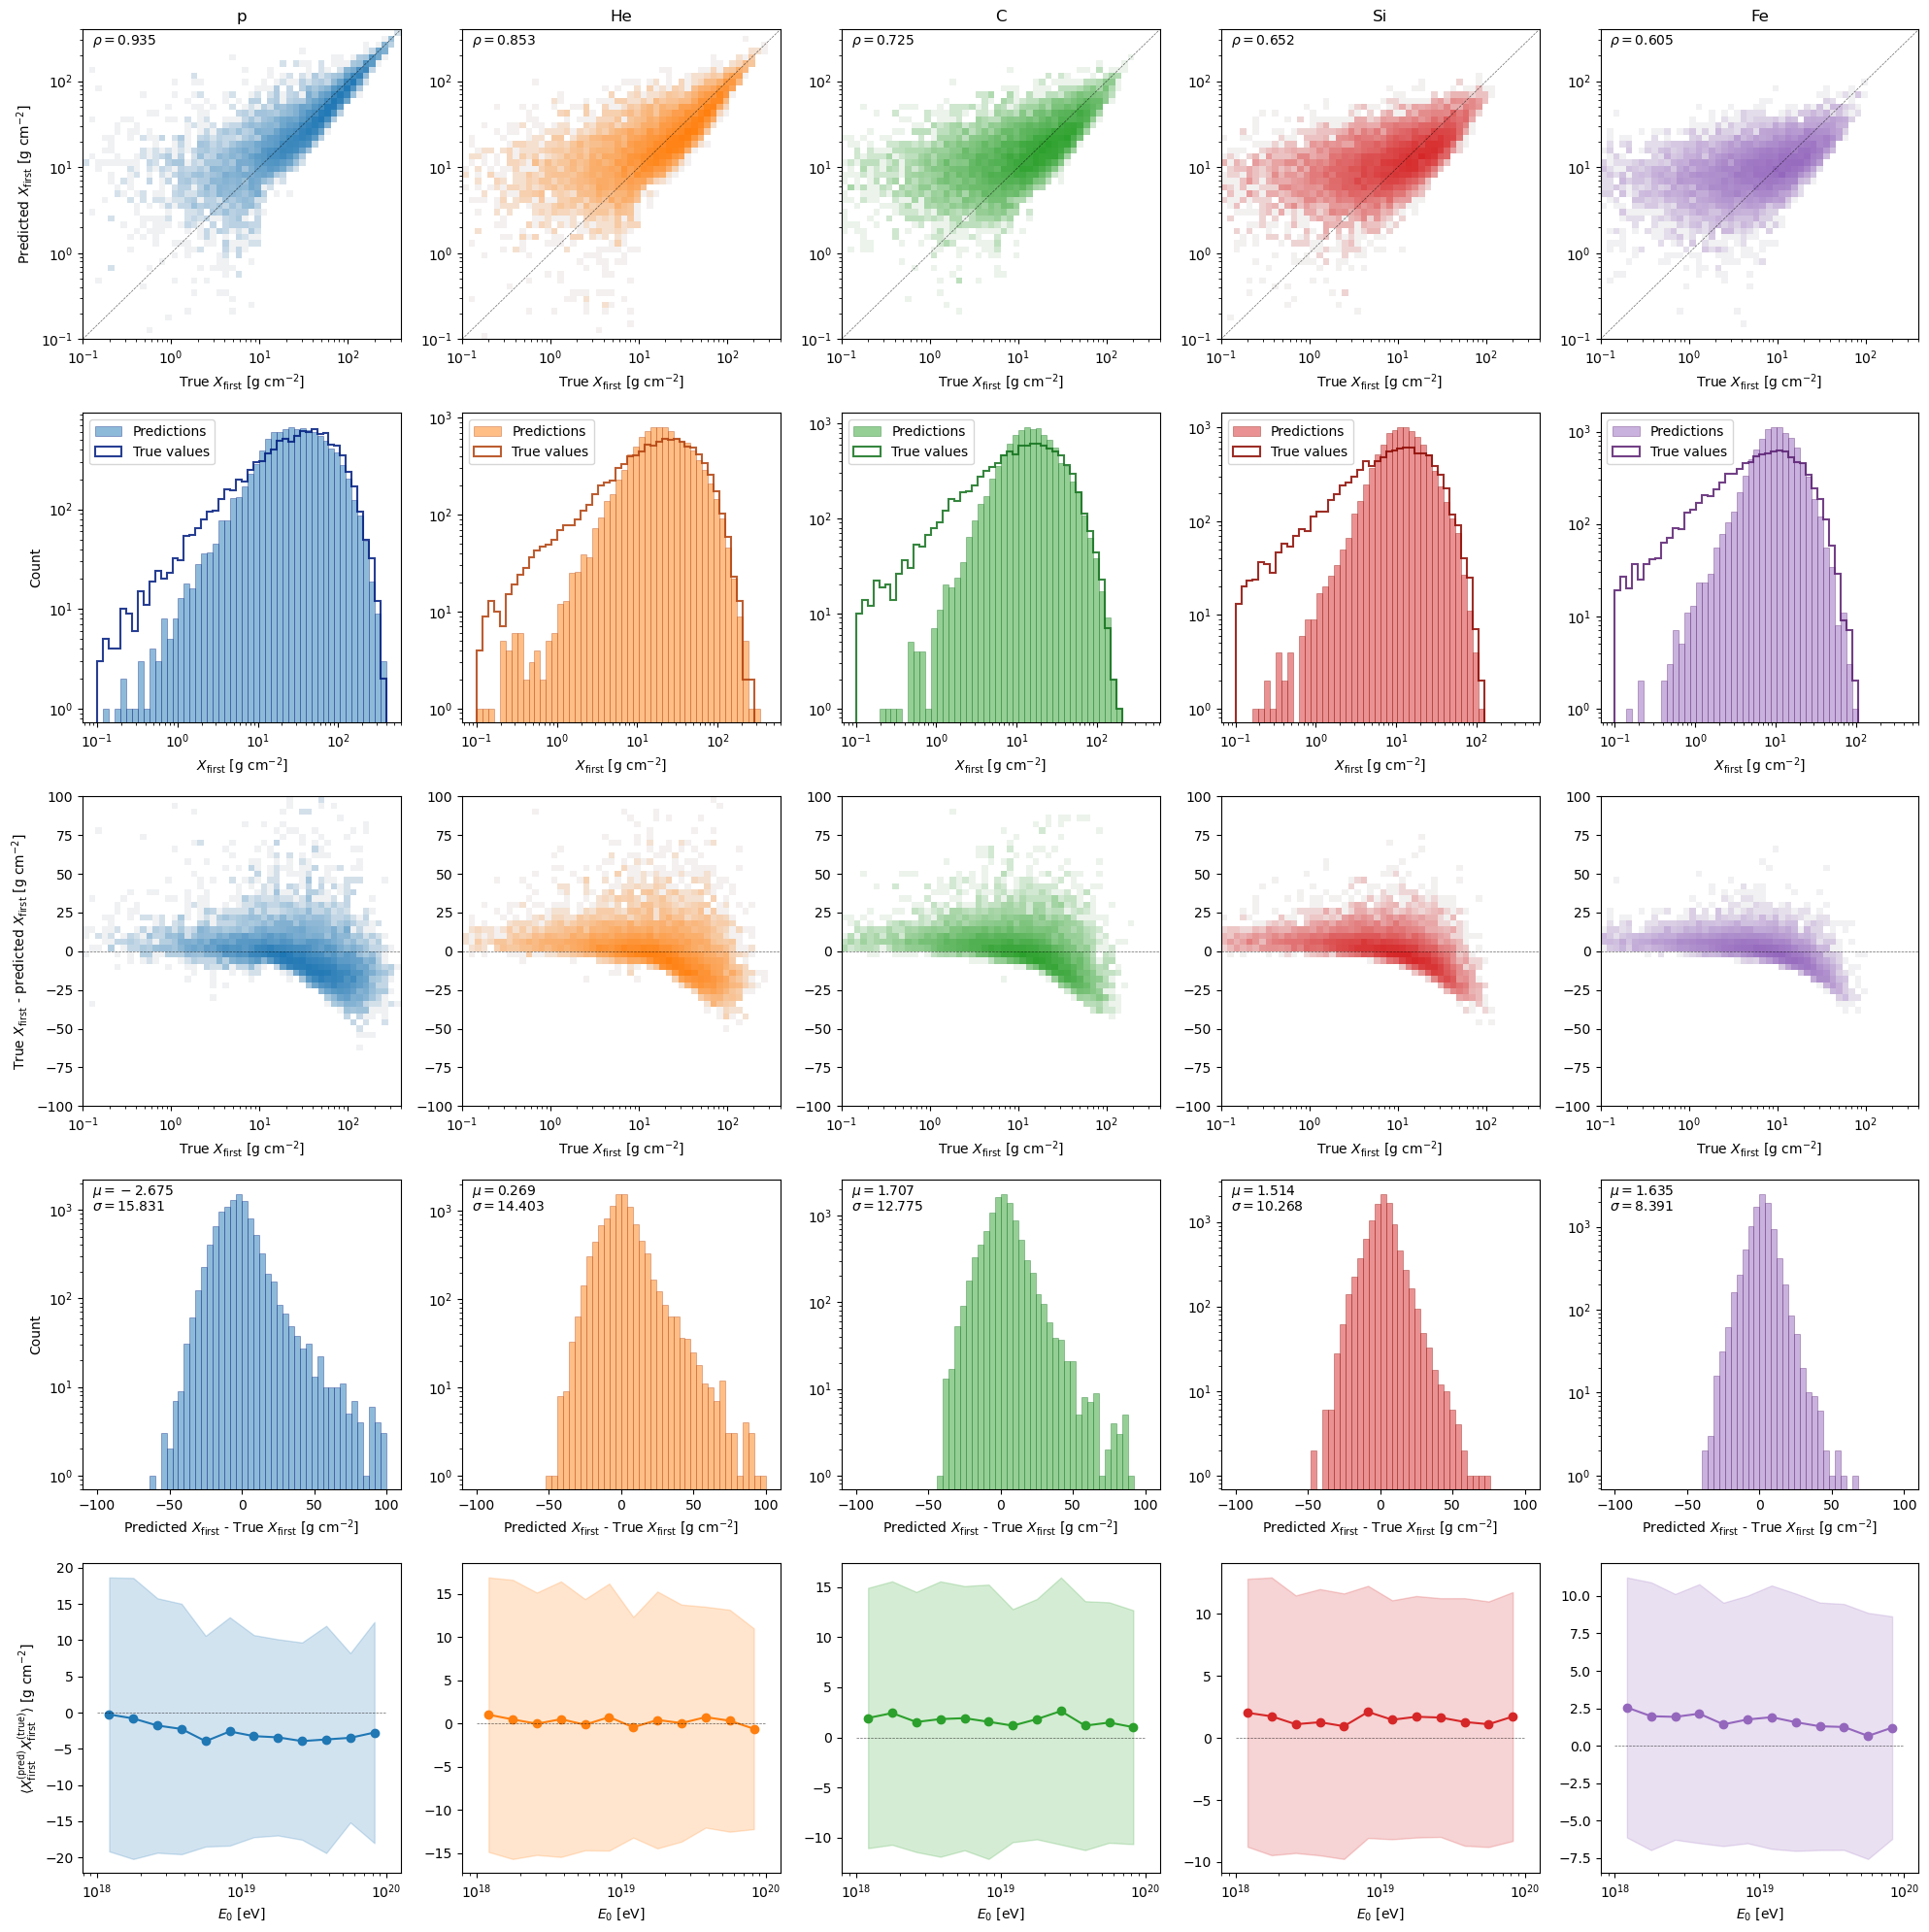

In [6]:
results = model.eval(data, plot = True)